# JLS corpus analyses

This is the code used to generate all graphs that are based on the JLS corpus. Since the fulltext of the journal is copyrighted, the data cannot be published. You need to download the PDFs via your institutional subscription and extract the raw text yourself. Each article must have its own file, named according to the DOI of the article, with slashes replaced by an underscore, and the `.txt` file extension. Then adapt the `corpus_dir` variable below to point the code to the directory containing all files. You might have to update the file `data/jls-doi-to-year.csv` to add DOI-year mappings for newly published articles.

## Load or generate dataset

In [2]:
from scripts.utils import create_cached_corpus
corpus = create_cached_corpus("jls3")
corpus

Analyzing article corpus:   0%|          | 0/1650 [00:00<?, ?it/s]

,doi,text,year,title,author
1141,10.2307/1409866,SOME JOBS FOR JURISPRUDEN...,1974,Some Jobs for Jurisprudence,Twining
1147,10.2307/1409872,Book Reviews...,1974,The Legal Structure,Sumner
1146,10.2307/1409871,effortsto drawto the attentionof those respons...,1974,Co-Operation between Lawyers and Sociologists:...,Treves
1145,10.2307/1409870,HOMELESSNESS: CAN THE COURTS CONTRIBUTE...,1974,Homelessness: Can the Courts Contribute?,James
1144,10.2307/1409869,SOCIAL ACTION AND A METHODOLOGY FOR TH...,1974,Social Action and a Methodology for the Sociol...,Grace
...,...,...,...,...,...
917,10.1111/jols.12294,DOI: 10.1111/jols.12294\n\n\nARTICLE\n\n\n\n\n...,2021,From contestation to conviction: terrorism exp...,ANWAR
918,10.1111/jols.12295,DOI: 10.1111/jols.12295\n\n\nARTICLE\n\n\n\n\n...,2021,Independent separate legal representation for ...,ILIADIS
919,10.1111/jols.12297,DOI: 10.1111/jols.12297\n\n\nARTICLE\n\n\n\n\n...,2021,Law and the construction of Jewish difference,RIEDEL
921,10.1111/jols.12303,Socio-Legal\nNEWSLETTER ...,2021,SLSA E‐Newsletter,


## Theoretical influences

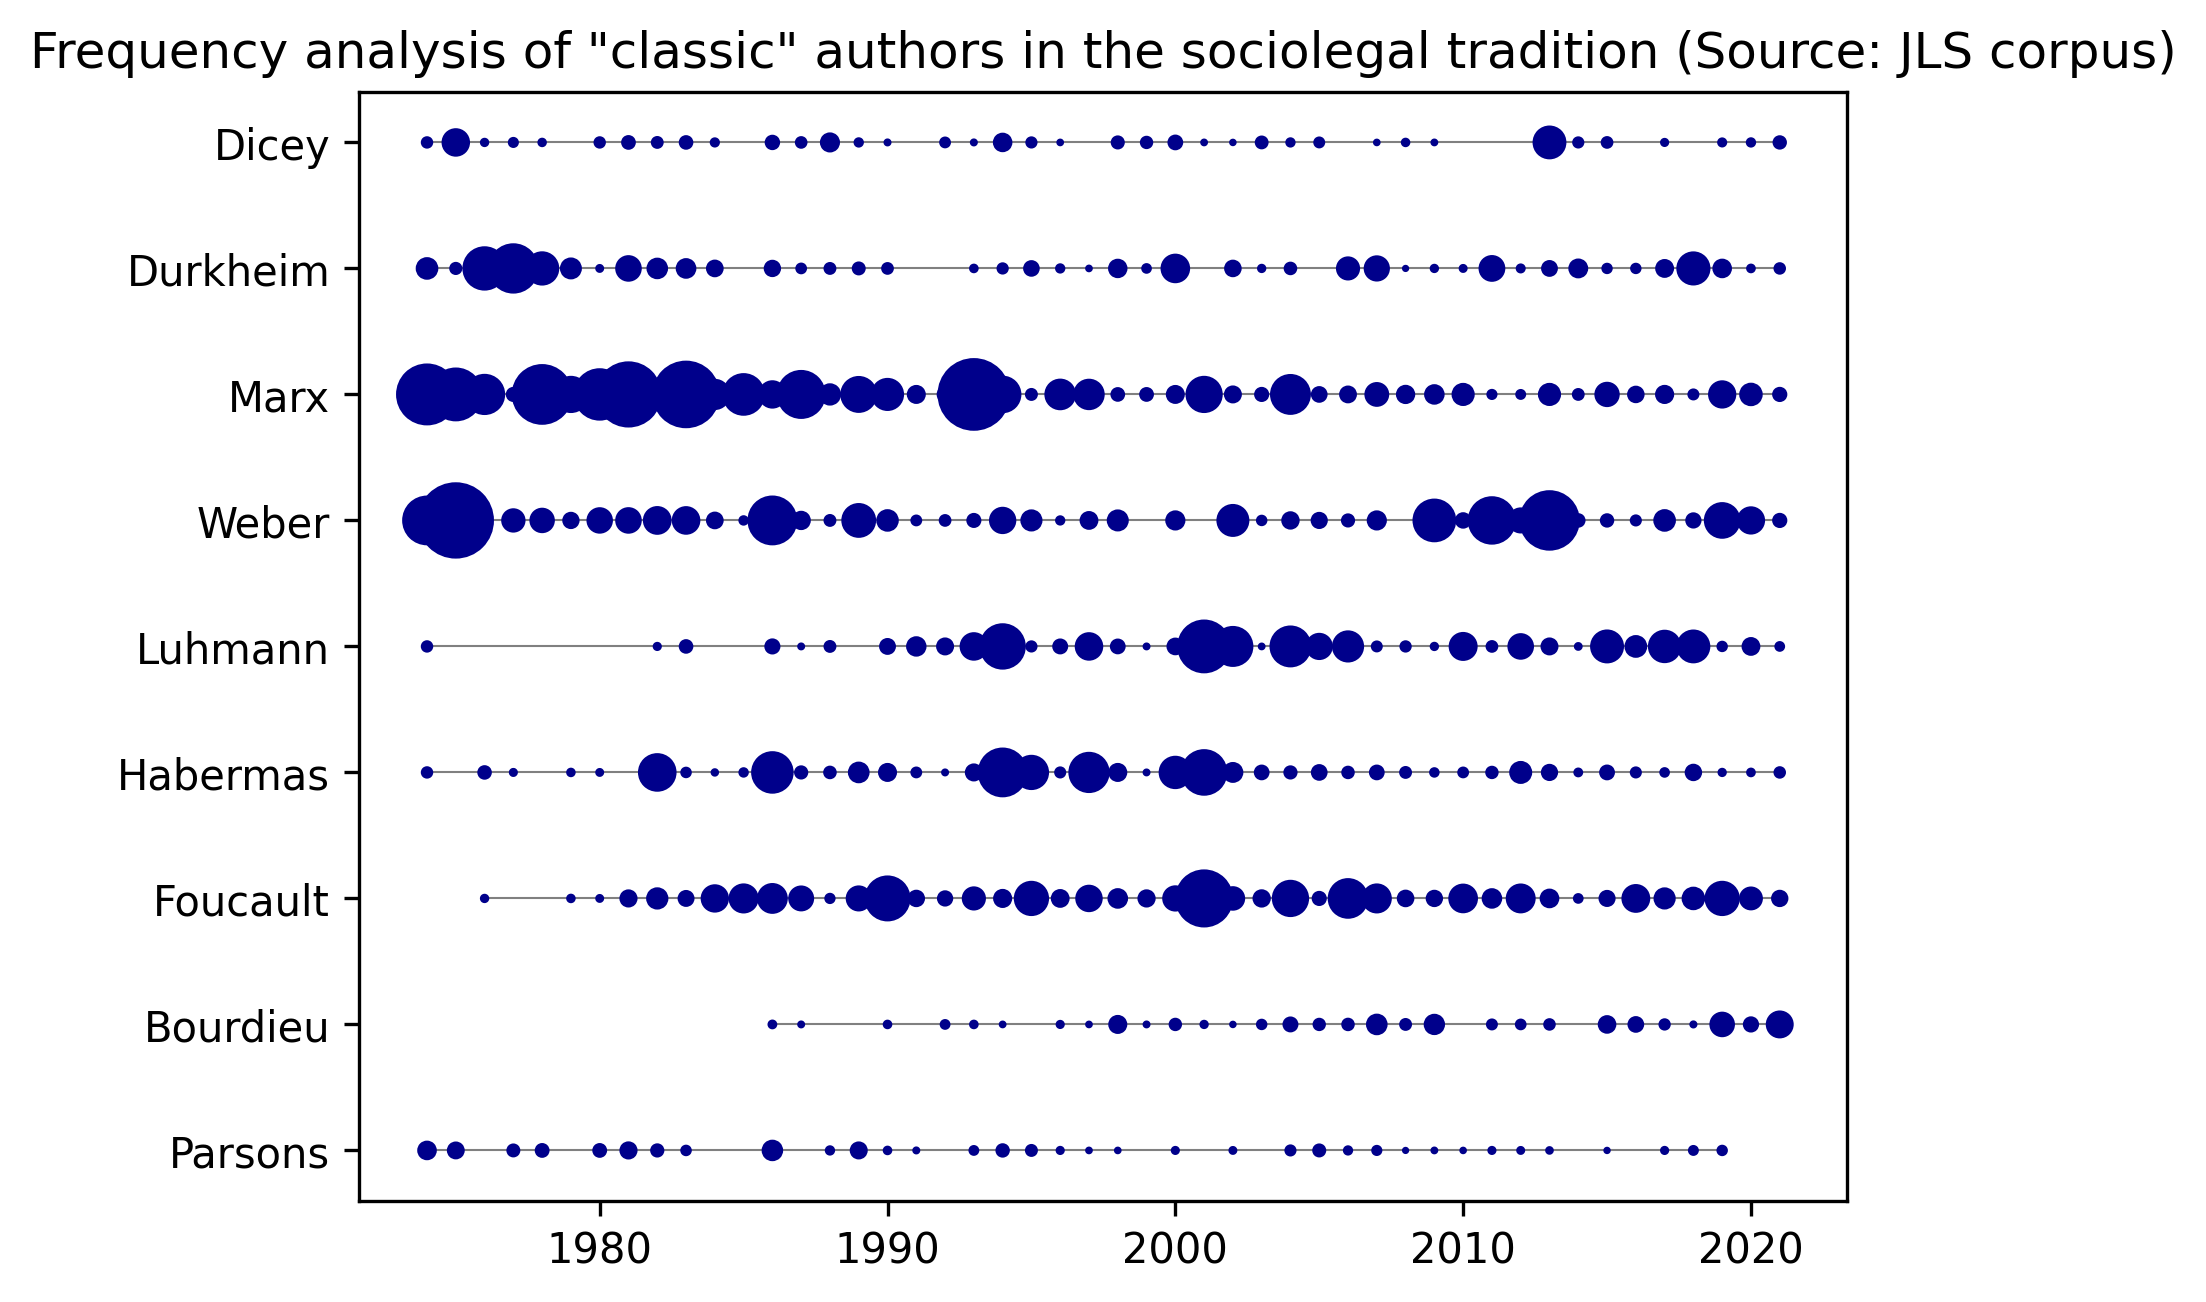

In [3]:
from scripts.utils import create_cached_corpus
from scripts.occurrence_by_year_scatter import prepare_data, plot_by_year
corpus = create_cached_corpus("jls3")
search_terms = ['Dicey', 'Durkheim', 'Marx', 'Weber', 'Luhmann', 'Habermas', 'Foucault', 'Bourdieu', 'Parsons']
search_terms.reverse()
plot_by_year(prepare_data(corpus, search_terms), title='Frequency analysis of "classic" authors in the sociolegal tradition (Source: JLS corpus)')

## Topicality

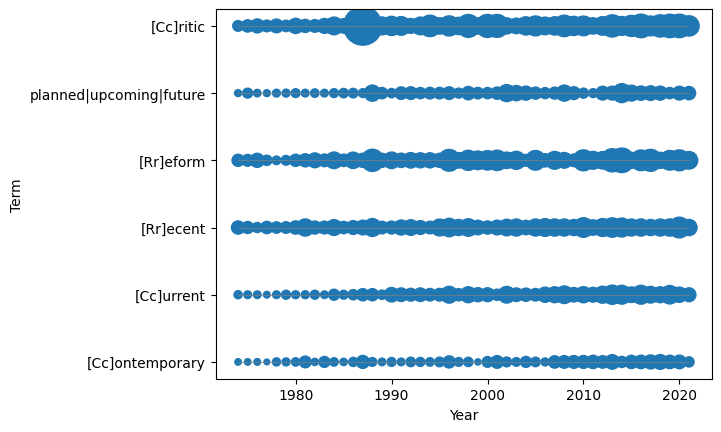

In [10]:
from scripts.occurrence_by_year_scatter import prepare_data, plot_by_year
data = prepare_data(articles_df, [r'[Cc]ontemporary' , r'[Cc]urrent' , r'[Rr]ecent' , r'[Rr]eform',  r'planned|upcoming|future', r'[Cc]ritic'])
plot_by_year(data, file='docs/jls-ts-tf-topicality.png')

## Teaching, Research & Evaluation

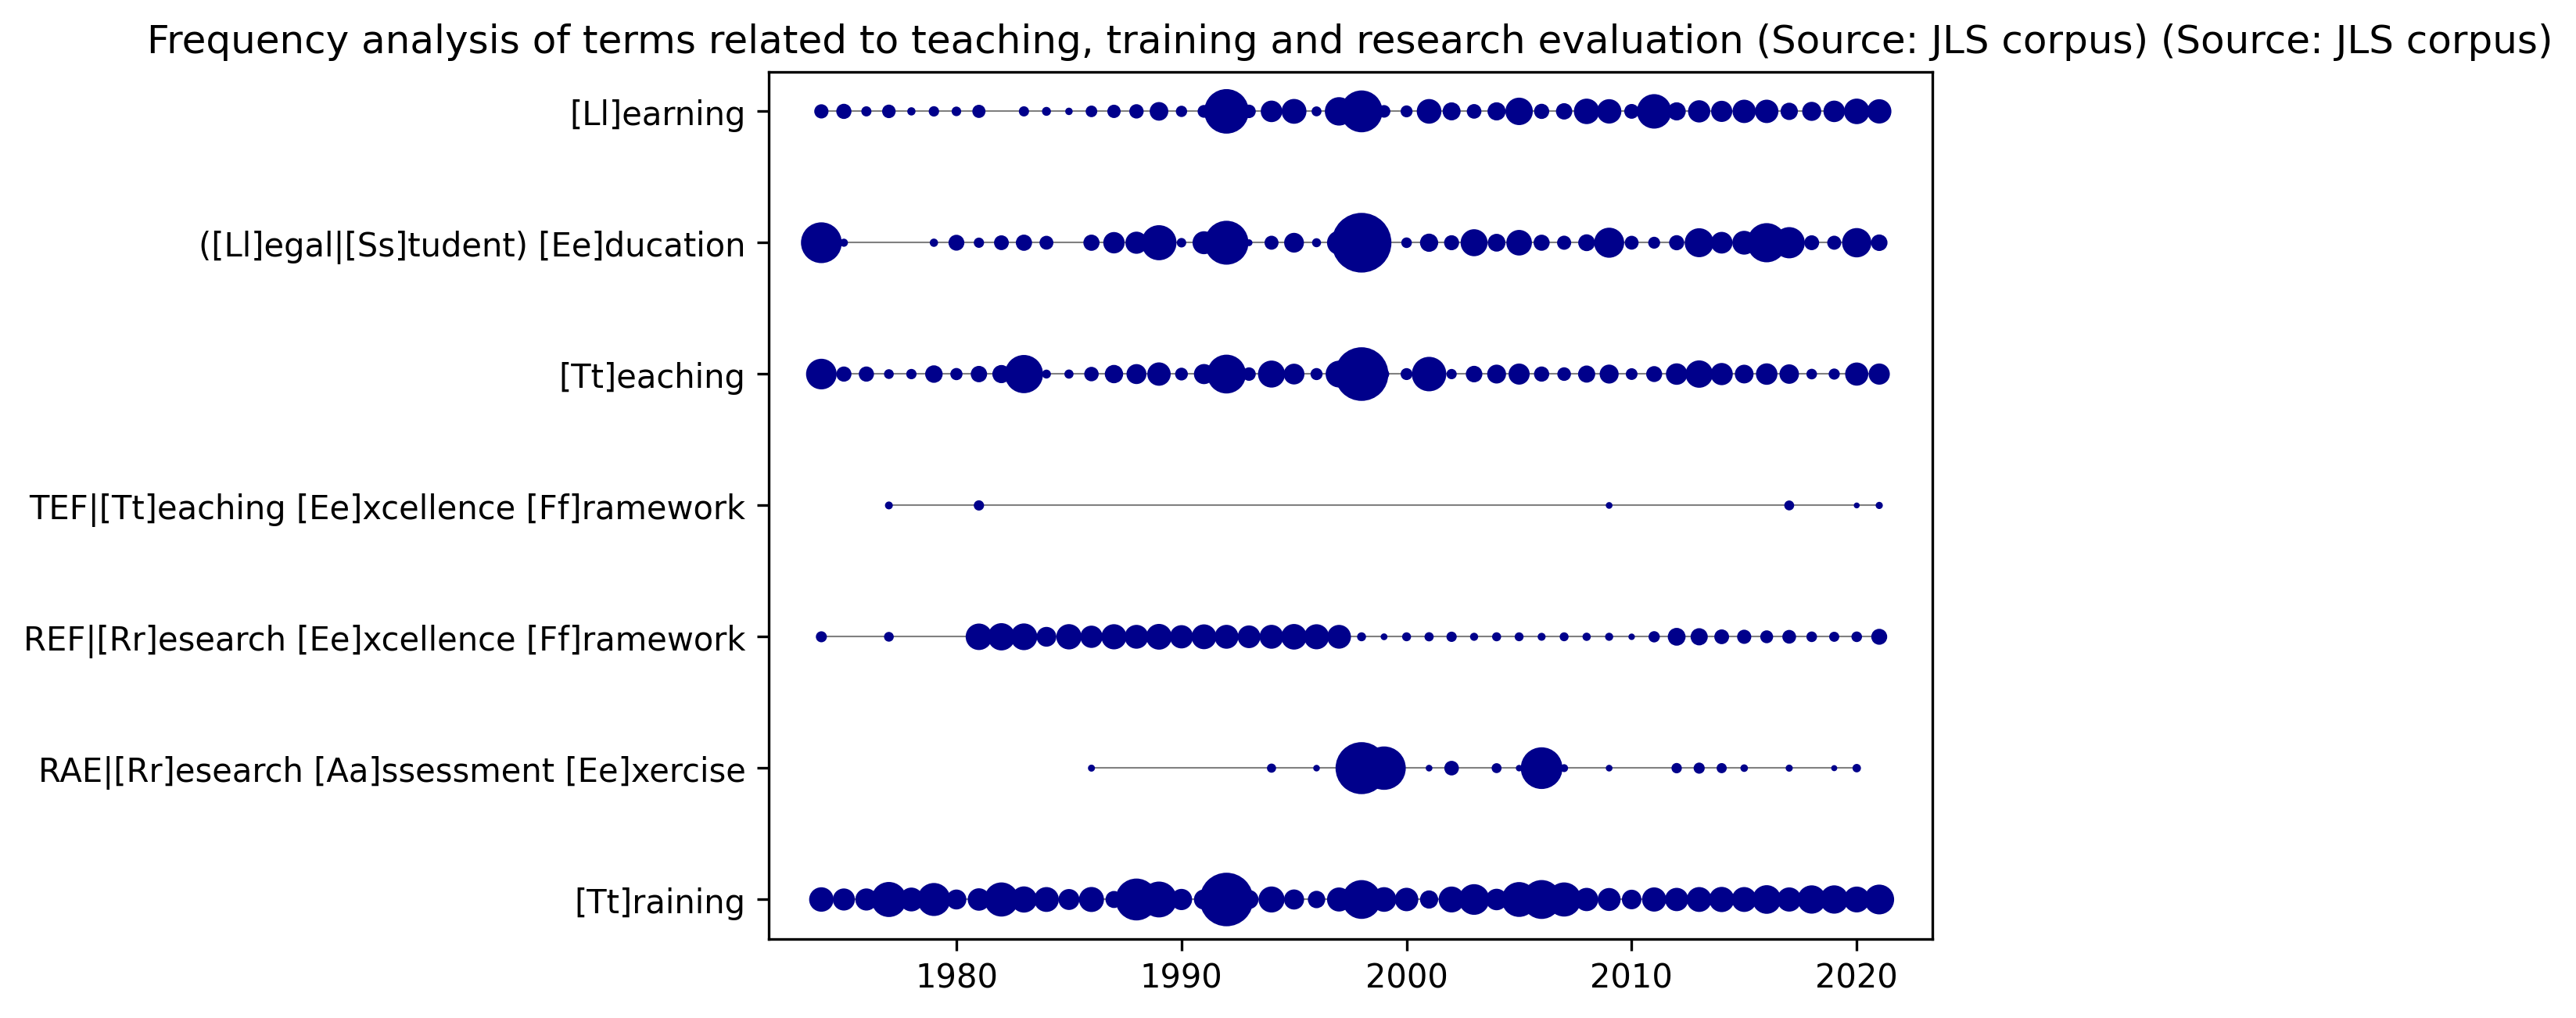

In [4]:
from scripts.utils import create_cached_corpus
from scripts.occurrence_by_year_scatter import prepare_data, plot_by_year
corpus = create_cached_corpus("jls3")
search_terms = [r'[Tt]raining',r'RAE|[Rr]esearch [Aa]ssessment [Ee]xercise',r'REF|[Rr]esearch [Ee]xcellence [Ff]ramework', r'TEF|[Tt]eaching [Ee]xcellence [Ff]ramework', r'[Tt]eaching',r'([Ll]egal|[Ss]tudent) [Ee]ducation', r'[Ll]earning']
data = prepare_data(corpus, search_terms)
plot_by_year(data,
             title='Frequency analysis of terms related to teaching, training and research evaluation (Source: JLS corpus) (Source: JLS corpus)')

## Theory and Method

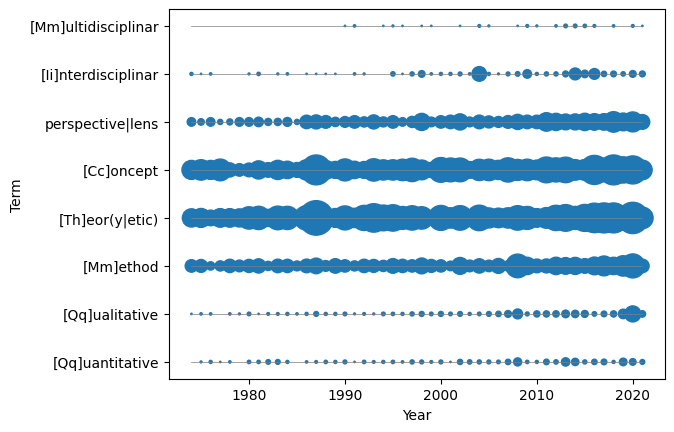

In [7]:
from scripts.occurrence_by_year_scatter import prepare_data, plot_by_year
data = prepare_data(articles_df, [r'[Qq]uantitative' , r'[Qq]ualitative' , r'[Mm]ethod',  r'[Th]eor(y|etic)', r'[Cc]oncept', r'perspective|lens', r'[Ii]nterdisciplinar', r'[Mm]ultidisciplinar'])
plot_by_year(data, file="docs/jls-ts-tf-theory-method.png")

## Data/empirical methods

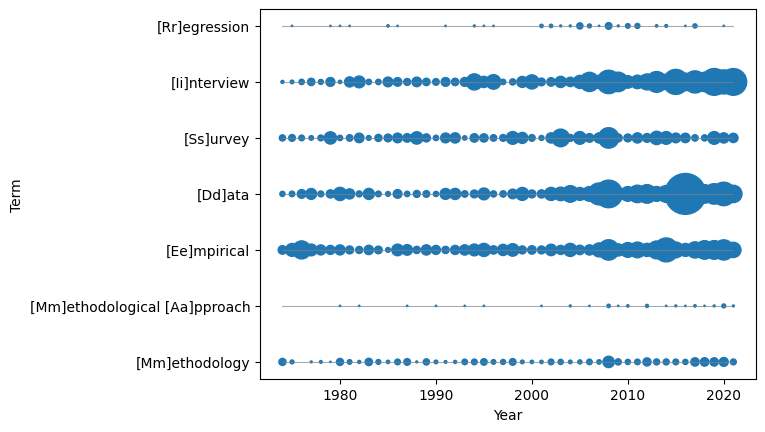

In [8]:
from scripts.occurrence_by_year_scatter import prepare_data, plot_by_year
data = prepare_data(articles_df, [r'[Mm]ethodology' , r'[Mm]ethodological [Aa]pproach', '[Ee]mpirical', "[Dd]ata", "[Ss]urvey", "[Ii]nterview", "[Rr]egression"])
plot_by_year(data, file="docs/jls-ts-tf-empirical-methods.png")

## Disciplinary influences

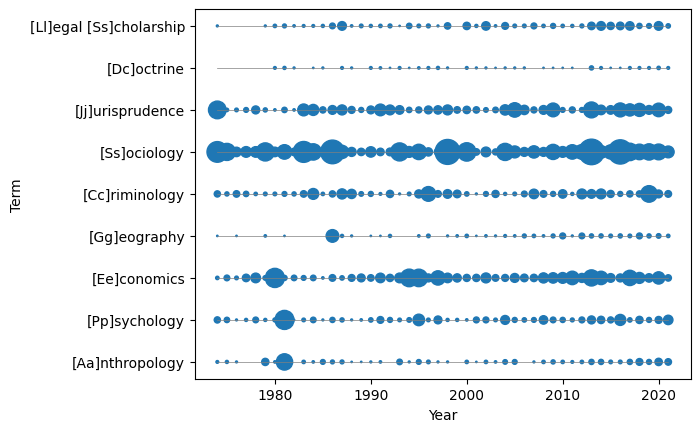

In [6]:
from scripts.occurrence_by_year_scatter import prepare_data, plot_by_year
data = prepare_data(articles_df, [r'[Aa]nthropology' , r'[Pp]sychology' , r'[Ee]conomics', r'[Gg]eography',  r'[Cc]riminology', '[Ss]ociology', '[Jj]urisprudence', '[Dc]octrine', '[Ll]egal [Ss]cholarship'])
plot_by_year(data, file="docs/jls-ts-tf-disciplines.png")